<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/ejercicio_cancer_mama_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio práctico: Preparación y entrenamiento de una red neuronal con el dataset de cáncer de mama

## 🎯 Propósito
Este ejercicio tiene como propósito ilustrar el flujo completo de preparación de datos para redes neuronales profundas utilizando un conjunto de datos real: el dataset de cáncer de mama disponible en scikit-learn. Se busca que el estudiante:

1. Comprenda cómo visualizar y estandarizar los datos de entrada.
2. Aprenda a realizar la partición del dataset de forma estratificada.
3. Entrene un modelo con Keras y evalúe su rendimiento.
4. Analice visualmente el proceso de entrenamiento mediante curvas de pérdida y precisión.


In [1]:
# 📥 Carga de librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

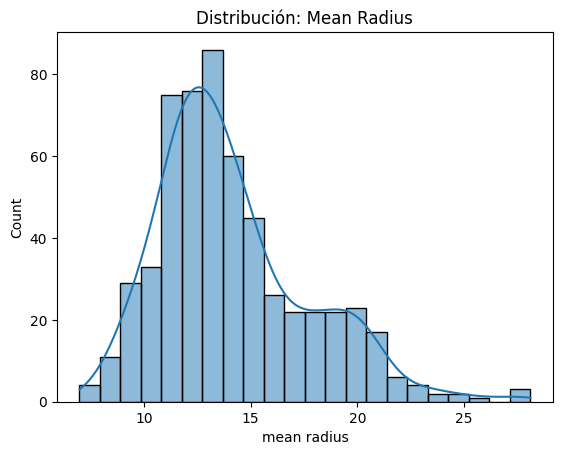

In [2]:
# 📊 1. Carga y visualización del dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Visualización de una variable continua
sns.histplot(X["mean radius"], kde=True).set_title("Distribución: Mean Radius")
plt.show()

In [3]:
# 🧮 2. Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 📂 3. División en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Verificación de balanceo
print("Entrenamiento:", y_train.value_counts(normalize=True))
print("Validación:", y_val.value_counts(normalize=True))
print("Prueba:", y_test.value_counts(normalize=True))

Entrenamiento: target
1    0.628141
0    0.371859
Name: proportion, dtype: float64
Validación: target
1    0.623529
0    0.376471
Name: proportion, dtype: float64
Prueba: target
1    0.627907
0    0.372093
Name: proportion, dtype: float64


In [5]:
# ⚙️ 4. Construcción del modelo
model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 🧠 5. Entrenamiento del modelo con EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4827 - loss: 0.7279 - val_accuracy: 0.8706 - val_loss: 0.5174
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9041 - loss: 0.4539 - val_accuracy: 0.9529 - val_loss: 0.3424
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9629 - loss: 0.2802 - val_accuracy: 0.9529 - val_loss: 0.2229
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9680 - loss: 0.1804 - val_accuracy: 0.9647 - val_loss: 0.1577
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9538 - loss: 0.1610 - val_accuracy: 0.9647 - val_loss: 0.1230
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9765 - loss: 0.1076 - val_accuracy: 0.9765 - val_loss: 0.1010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9727 - loss: 0.0849 - val_accuracy: 0.9765 - val_loss: 0.0856
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.1023 - val_accuracy: 0.9765 -

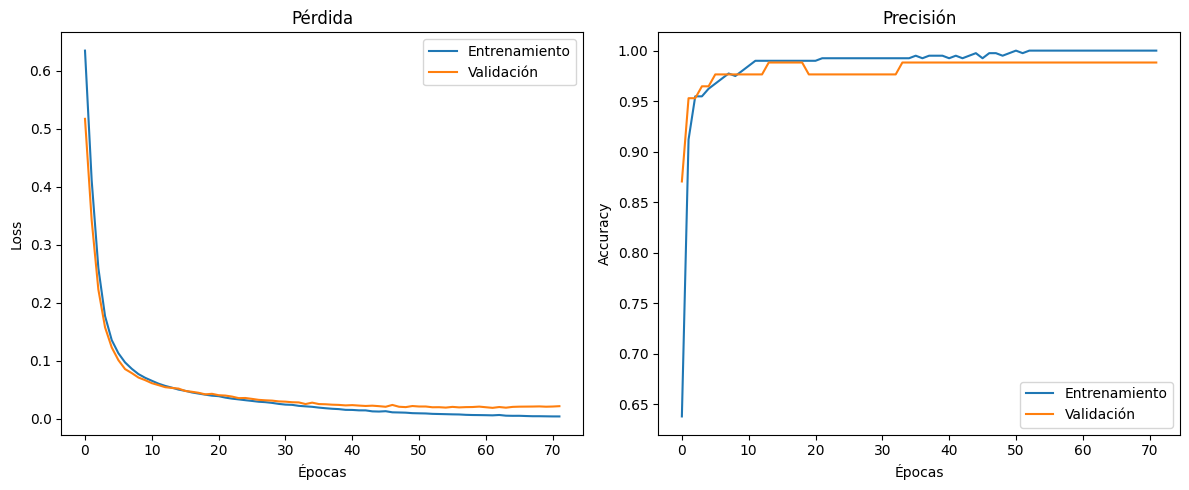

In [7]:
# 📈 6. Visualización de curvas de pérdida y precisión
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# 🧪 7. Evaluación en conjunto de prueba
y_pred = (model.predict(X_test).flatten() > 0.5).astype(int)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Matriz de Confusión:
[[31  1]
 [ 1 53]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.98      0.98      0.98        54

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



## ✅ Conclusiones
- La estandarización permitió un aprendizaje eficiente y estable.
- El balanceo de clases se mantuvo en cada conjunto gracias a la estratificación.
- El modelo se entrenó correctamente sin sobreajuste, gracias al uso de EarlyStopping.
- Las curvas de entrenamiento ofrecieron una visión clara del proceso de ajuste.
- La evaluación final en el conjunto de prueba mostró un desempeño robusto del modelo.
